In [1]:
# Bibliotecas

# Tratamento de dados
import pandas as pd
import numpy as np


# gráficos
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22
import matplotlib.pyplot as plt

# Transformação dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# aprodizado de maquina
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [2]:
# motando o google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
link = '/content/drive/MyDrive/UFC_mestrado/Sigaa_UFC/1_semestre/aprendizagem_automatica/lista_04_ama/dados/concrete.csv'

In [4]:
df = pd.read_csv(link, header=None)

In [5]:
dados = np.array(df)

In [6]:
print(f'Quantidade de linhas: {dados.shape[0]} Quantidade de colunas: {dados.shape[1]}')

Quantidade de linhas: 1030 Quantidade de colunas: 9


Considere o conjunto de dados disponível em concrete.csv, organizado em 9
colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída.
Os 8 atributos referem-se à caracterização de diferentes tipos de concreto para

construção civil. A saída é a resistência à compressão do concreto (em me-
gapascals, MPa). Maiores detalhes sobre os dados podem ser conferidos em

https://www.openml.org/d/4353.

a) Considere um modelo de regressão não linear baseado em redes neurais
artificiais. Separe os dados aleatoriamente em treino, validação e teste
(por exemplo, 60%, 20% e 20%). Nesse cenário, treine e avalie o modelo
abaixo:

In [7]:
# Separar os atributos (X) e a saída (y)
X = dados[:, :-1]  # As 8 primeiras colunas são os atributos
y = dados[:, -1]   # A última coluna é a saída

# Dividir os dados em treino (60%), validação (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Tamanho do conjunto de treino:", X_train.shape[0])
print("Tamanho do conjunto de validação:", X_val.shape[0])
print("Tamanho do conjunto de teste:", X_test.shape[0])

Tamanho do conjunto de treino: 618
Tamanho do conjunto de validação: 206
Tamanho do conjunto de teste: 206


In [8]:
# Construir o modelo de rede neural
model = Sequential()

# Adicionar a primeira camada densa (input)
model.add(Dense(64, input_dim = X_train.shape[1], activation='relu'))

# Adicionar camadas ocultas adicionais (opcional)
model.add(Dense(64, activation='relu'))

# Camada de saída
model.add(Dense(1, activation='linear'))

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Resumo do modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Treinar o modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=32)

# Avaliar o modelo no conjunto de teste
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error no conjunto de teste:", mae)


Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 760.1518 - mae: 20.8291 - val_loss: 241.0869 - val_mae: 12.0184
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 156.3721 - mae: 9.7664 - val_loss: 140.4967 - val_mae: 9.5062
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 127.8056 - mae: 8.7531 - val_loss: 105.3370 - val_mae: 7.8543
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 97.5618 - mae: 7.7051 - val_loss: 108.6523 - val_mae: 8.5101
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96.4501 - mae: 7.5500 - val_loss: 92.4649 - val_mae: 7.3033
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84.8307 - mae: 7.1179 - val_loss: 93.7876 - val_mae: 7.6939
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.9401 - mae: 7.3581 - val_loss: 110.1079 - val_mae: 8.8025
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 90.1374 - mae: 7.5804 - val_loss: 88.3723 - val_mae: 7.4350
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━

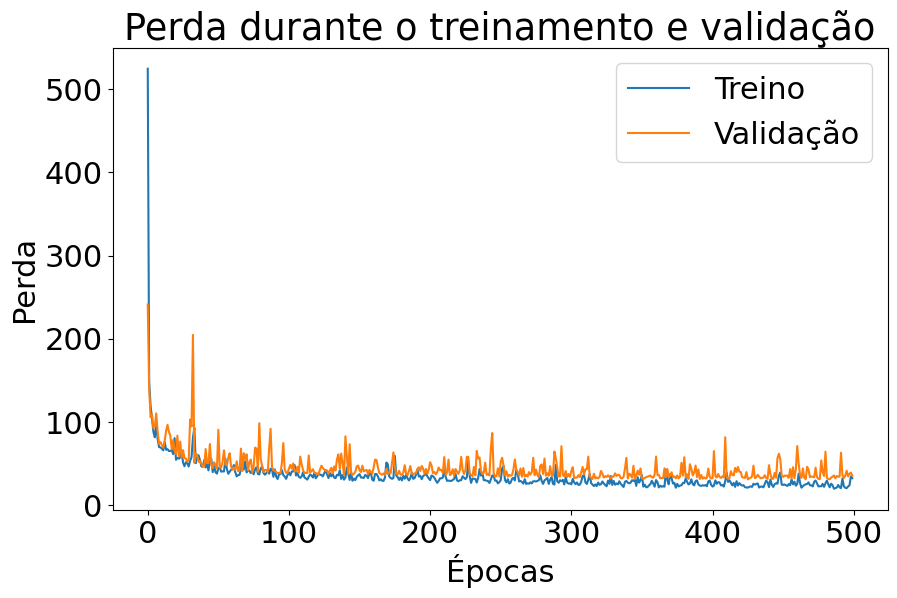

In [10]:
import matplotlib.pyplot as plt

# Plotar a perda durante o treinamento e validação
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()


– MLP (multilayer perceptron): 1 camada oculta e treinamento
em minibatch via gradiente descendente estocástico com termo de

momentum. Utilize o conjunto de validação para ajustar os hiperpa-
râmetros.

In [11]:
# Construir o modelo de rede neural (MLP)
model = Sequential()

# Adicionar a camada oculta com ativação ReLU
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Adicionar a camada de saída com ativação linear
model.add(Dense(1, activation='linear'))

# Compilar o modelo com SGD + momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Resumo do modelo
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Treinar o modelo com minibatch
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Avaliar o modelo no conjunto de teste
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error no conjunto de teste:", mae)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

In [13]:
# Experimentar diferentes valores para taxa de aprendizado e momentum
learning_rates = [0.001, 0.01, 0.1]
momentums = [0.8, 0.9, 0.99]

best_mae = float('inf')
best_params = {}

for lr in learning_rates:
    for m in momentums:
        optimizer = SGD(learning_rate=lr, momentum=m)
        model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
        model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

        # Avaliar no conjunto de validação
        val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)

        if val_mae < best_mae:
            best_mae = val_mae
            best_params = {'learning_rate': lr, 'momentum': m}

print("Melhores hiperparâmetros encontrados:")
print("Taxa de aprendizado:", best_params['learning_rate'])
print("Momentum:", best_params['momentum'])


Melhores hiperparâmetros encontrados:


KeyError: 'learning_rate'

Passo 1: Treinar o Modelo e Plotar as Curvas de Custo

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Treinar o modelo com minibatch
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)

# Plotar as curvas de função custo (perda) nos conjuntos de treinamento e validação
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Função Custo ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()


Passo 2: Calcular as Métricas RMSE, MAE e MRE

In [ ]:
# Função para calcular RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Função para calcular MRE
def mre(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# Fazer previsões nos conjuntos de treino, validação e teste
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calcular as métricas para o conjunto de treino
rmse_train = rmse(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mre_train = mre(y_train, y_train_pred)

# Calcular as métricas para o conjunto de validação
rmse_val = rmse(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mre_val = mre(y_val, y_val_pred)

# Calcular as métricas para o conjunto de teste
rmse_test = rmse(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mre_test = mre(y_test, y_test_pred)

# Reportar os resultados
print("Conjunto de Treino:")
print(f"RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, MRE: {mre_train:.4f}")

print("\nConjunto de Validação:")
print(f"RMSE: {rmse_val:.4f}, MAE: {mae_val:.4f}, MRE: {mre_val:.4f}")

print("\nConjunto de Teste:")
print(f"RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}, MRE: {mre_test:.4f}")
